# Lab 4. Exploring discrete data

### Intro and objectives
#### review discrete distributions
### review methods to explore the distribution of discrete data

### In this lab you will learn:
1. examples of discrete distribitions
2. how to explore discrete variables


## 0. Let's import required libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli,binom,poisson
from IPython.display import Latex
import scipy as sp
import pandas as pd
import seaborn as sns

## 1. Discrete Distributions
### 1.1 Bernoulli Distribution
#### In probability theory and statistics, the Bernoulli distribution is the discrete probability distribution of a random variable which takes the value 1 with probability $p$ and the value 0 with probability $q=1-p$. 

#### Less formally, it can be thought of as a model for the set of possible outcomes of any single experiment that asks a yes–no question. Such questions lead to outcomes that are boolean-valued: a single bit whose value is yes with probability $p$ and no with probability $q$. 

#### It can be used to represent a (possibly biased) coin toss where 1 and 0 would represent "heads" and "tails" (or vice versa), respectively, and $p$ would be the probability of the coin landing on heads or tails, respectively. 


<AxesSubplot:ylabel='Count'>

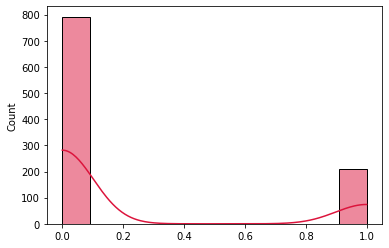

In [2]:
sns.histplot(bernoulli.rvs(size=1000,p=0.2),kde=True,color='crimson',label='p=0.2')

<AxesSubplot:ylabel='Count'>

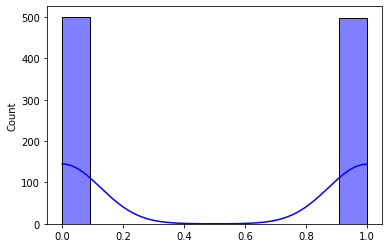

In [3]:
sns.histplot(bernoulli.rvs(size=1000,p=0.5),kde=True,color='blue',label='p=0.5')

<AxesSubplot:ylabel='Count'>

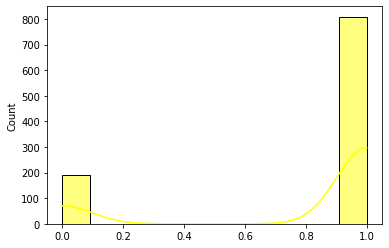

In [4]:
sns.histplot(bernoulli.rvs(size=1000,p=0.8),kde=True,color='yellow',label='p=0.8')

### 1.2 Binomial Distribution
#### In probability theory and statistics, the binomial distribution with parameters $n$ and $p$ is the discrete probability distribution of the number of successes in a sequence of $n$ independent experiments, each asking a yes–no question, and each with its own Boolean-valued outcome: success (with probability $p$) or failure (with probability $q = 1 − p$). 

#### For example, tossing of a coin always gives a head or a tail. The probability of finding exactly 3 heads in tossing a coin repeatedly for 10 times is estimated by a binomial distribution.

#### A single success/failure experiment is also called a Bernoulli trial or Bernoulli experiment, and a sequence of outcomes is called a Bernoulli process; for a single trial, i.e., $n = 1$, the binomial distribution is a Bernoulli distribution.

<AxesSubplot:ylabel='Count'>

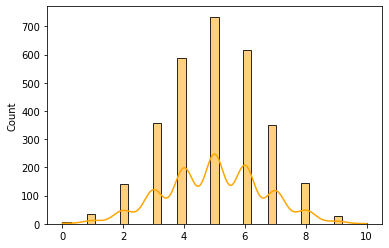

In [5]:
sns.histplot(binom.rvs(n=10,p=0.5,loc=0,size=3000),kde=True,color='orange')

<AxesSubplot:ylabel='Count'>

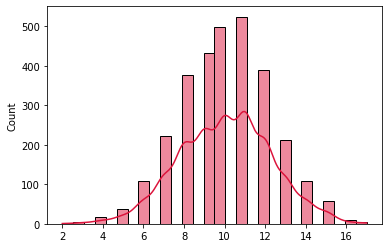

In [6]:
sns.histplot(binom.rvs(n=20,p=0.5,loc=0,size=3000),kde=True,color='crimson')

<AxesSubplot:ylabel='Count'>

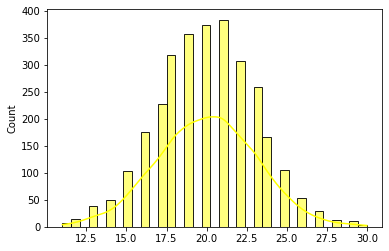

In [7]:
sns.histplot(binom.rvs(n=40,p=0.5,loc=0,size=3000),kde=True,color='yellow')

<AxesSubplot:ylabel='Count'>

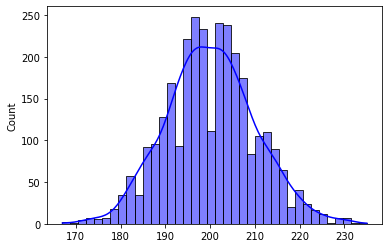

In [8]:
sns.histplot(binom.rvs(n=400,p=0.5,loc=0,size=3000),kde=True,color='blue')

### 1.3 Poisson Distribution
#### In probability theory and statistics, the Poisson distribution, is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate and independently of the time since the last event. The Poisson distribution can also be used for the number of events in other specified intervals such as distance, area or volume.

#### For instance, a call center receives an average of 180 calls per hour, 24 hours a day. The calls are independent; receiving one does not change the probability of when the next one will arrive. The number of calls received during any minute has a Poisson probability distribution: the most likely numbers are 2 and 3 but 1 and 4 are also likely and there is a small probability of it being as low as zero and a very small probability it could be 10. 

<AxesSubplot:ylabel='Count'>

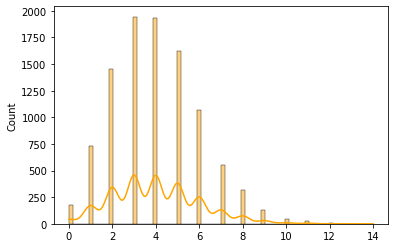

In [9]:
sns.histplot(poisson.rvs(mu=4, size=10000),kde=True,color='orange')

<AxesSubplot:ylabel='Count'>

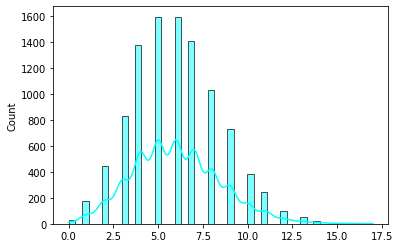

In [10]:
sns.histplot(poisson.rvs(mu=6, size=10000),kde=True,color='cyan')

<AxesSubplot:ylabel='Count'>

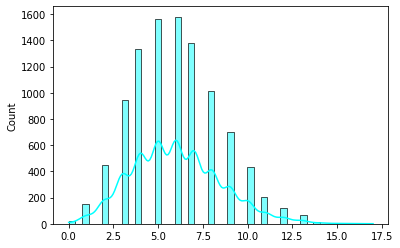

In [11]:
sns.histplot(poisson.rvs(mu=6, size=10000),kde=True,color='cyan')

## 2. Analysis of discrete variables
### Context of the titanic dataset

In [24]:
titanic = sns.load_dataset("titanic")

In [25]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [26]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [28]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

### There are several discrete variables: "survived","pclass","sex",""sibsp""parch","embarked","class","who","adult_male","deck","embark_town","alive","alone"

In [31]:
titanic[['survived', 'pclass', 'sex', 'sibsp', 'parch', 
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone']].head()

,survived,pclass,sex,sibsp,parch,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,1,0,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,1,0,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,0,0,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,1,0,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,0,0,S,Third,man,True,NaN,Southampton,no,True


In [32]:
titanic[['survived', 'pclass', 'sex', 'sibsp', 'parch', 
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone']].describe()

,survived,pclass,sibsp,parch
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.523008,0.381594
std,0.486592,0.836071,1.102743,0.806057
min,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,0.000000
max,1.000000,3.000000,8.000000,6.000000


In [ ]:
### 2.1. Distribution

In [35]:
variablesToPlot=titanic[['survived', 'pclass', 'sex', 'sibsp', 'parch', 
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone']].columns

survived


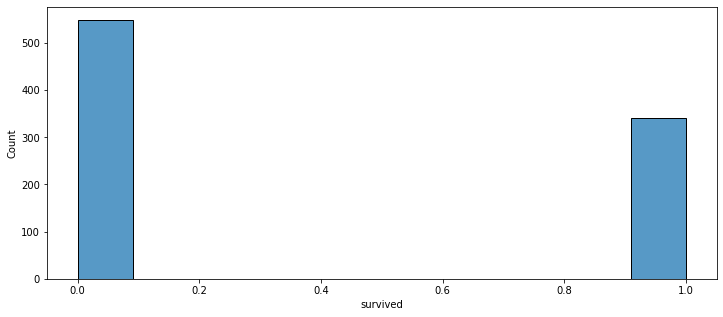

pclass


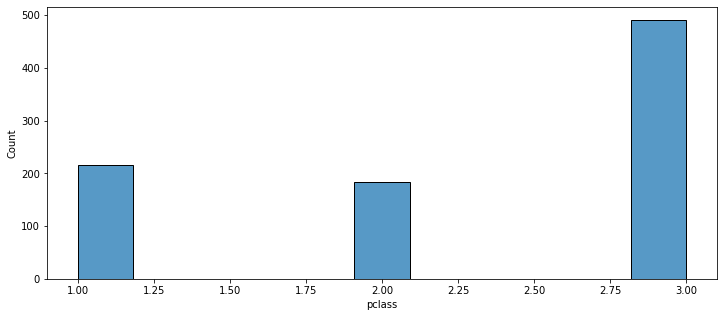

sex


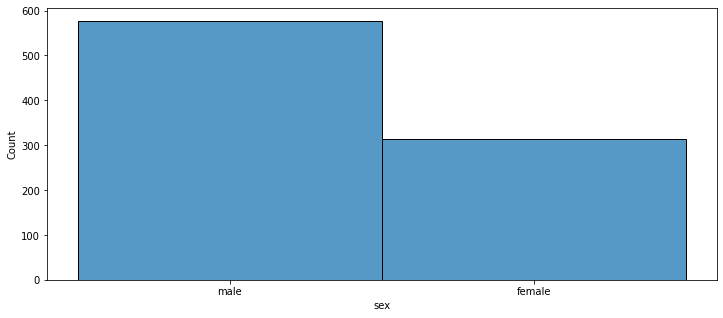

sibsp


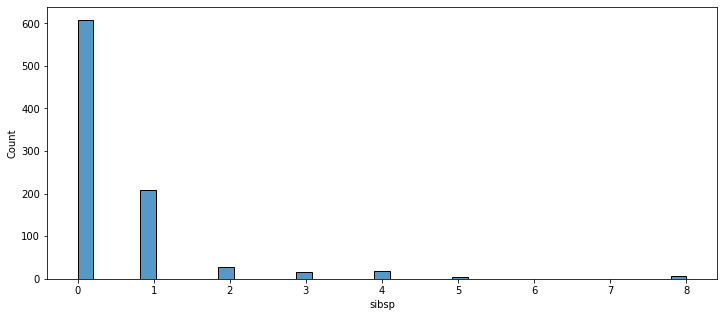

parch


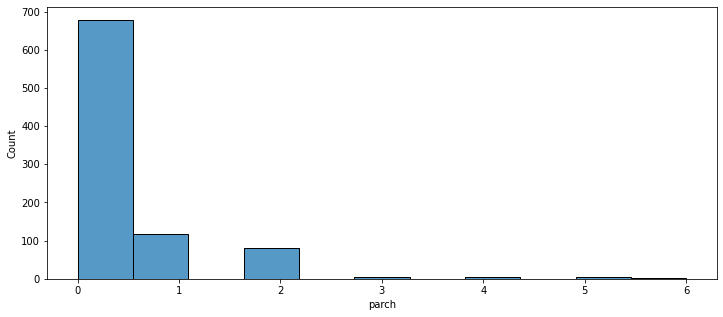

embarked


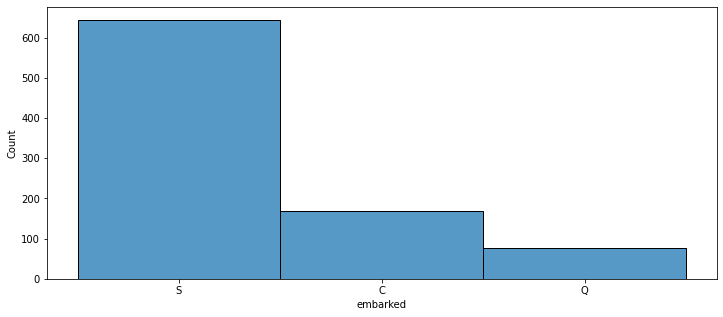

class


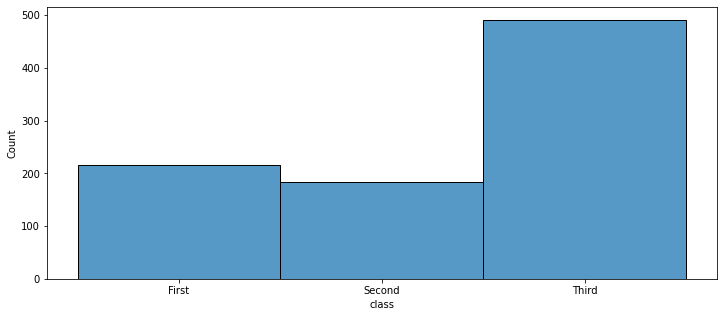

who


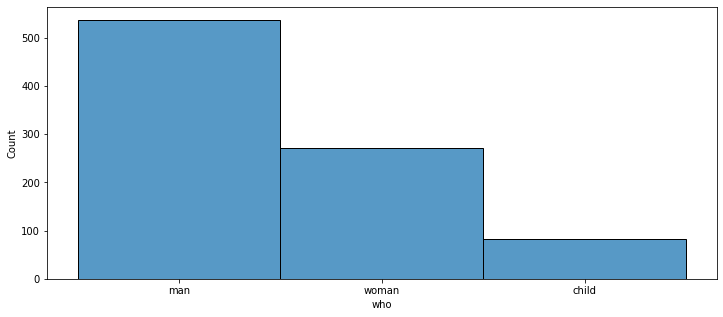

adult_male


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

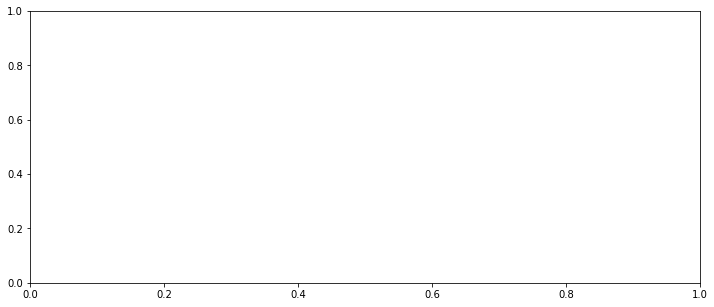

In [42]:
for item in variablesToPlot:
    print(item)
    f, axes = plt.subplots(1, 1,figsize=(12,5))
    sns.histplot(titanic[item],kde=False);
    
    
    plt.show()

### 2.1 Will you survive the titanic experience ?

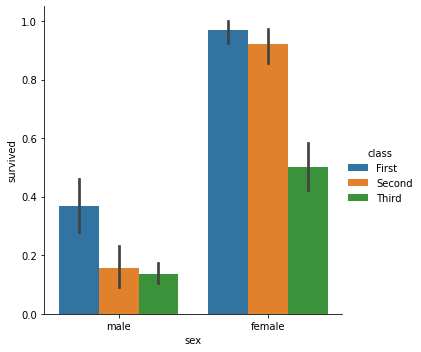

In [34]:
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)

## 2. Analysis of continuous variables
### Context of the happiness dataset

In [14]:
happinessDataFrame = pd.read_csv('../data/world-happiness-report.csv',parse_dates=['year'])

In [15]:
happinessDataFrame.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008-01-01,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009-01-01,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010-01-01,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011-01-01,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012-01-01,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [16]:
happinessDataFrame.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [17]:
happinessDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Country name                      1949 non-null   object        
 1   year                              1949 non-null   datetime64[ns]
 2   Life Ladder                       1949 non-null   float64       
 3   Log GDP per capita                1913 non-null   float64       
 4   Social support                    1936 non-null   float64       
 5   Healthy life expectancy at birth  1894 non-null   float64       
 6   Freedom to make life choices      1917 non-null   float64       
 7   Generosity                        1860 non-null   float64       
 8   Perceptions of corruption         1839 non-null   float64       
 9   Positive affect                   1927 non-null   float64       
 10  Negative affect                   1933 non-null 

### We observe that the happiness dataset has 9 continuous variables, one time-related variable (year) and one categorical one (Country)

In [18]:
happinessDataFrame[[ 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect']].head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [19]:
happinessDataFrame[[ 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect']].describe()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


In [20]:
variablesToPlot=happinessDataFrame[[ 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect']].columns

Life Ladder


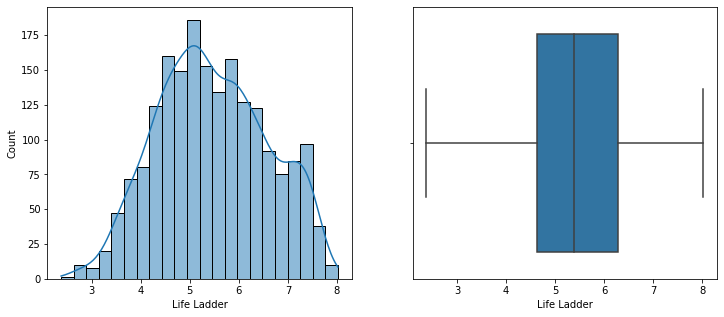

Log GDP per capita


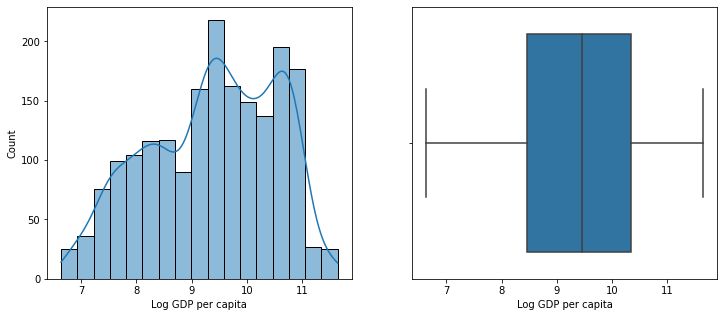

Social support


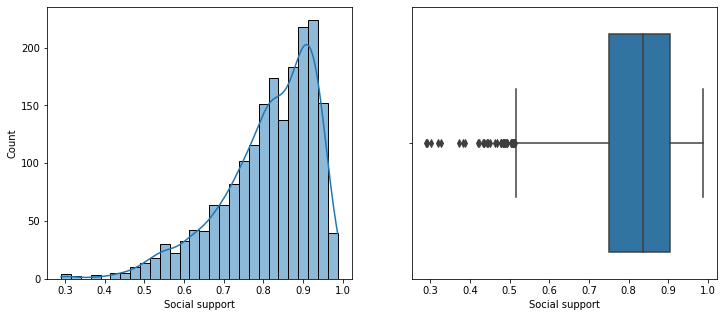

Healthy life expectancy at birth


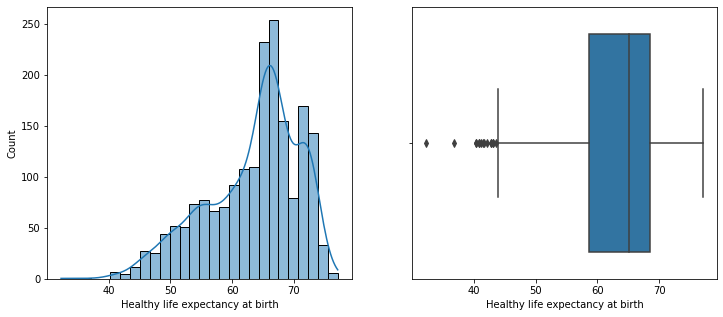

Freedom to make life choices


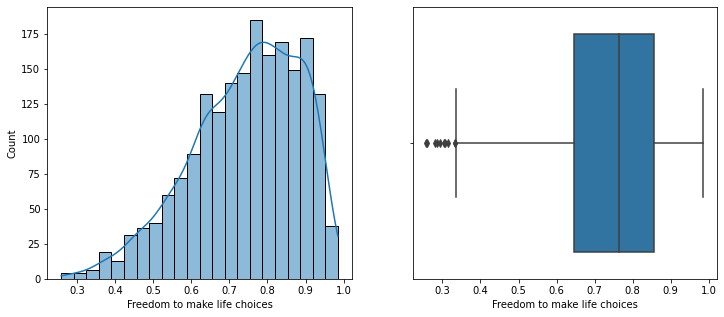

Generosity


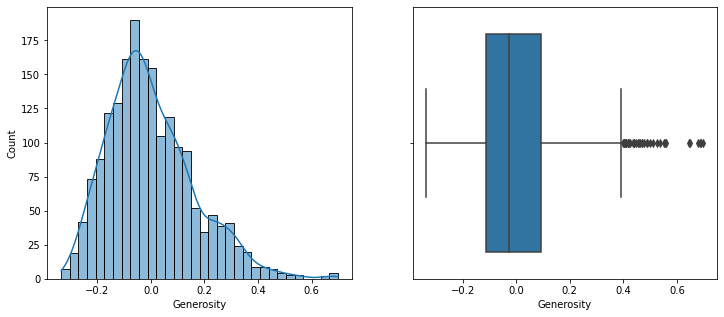

Perceptions of corruption


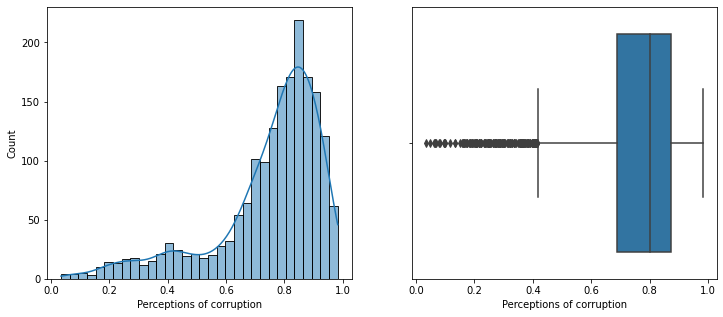

Positive affect


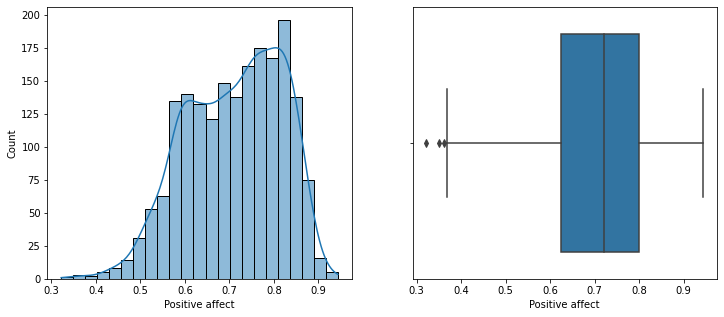

Negative affect


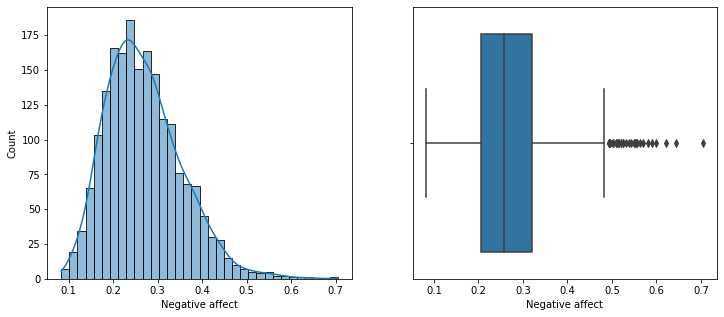

In [21]:
for item in variablesToPlot:
    print(item)
    f, axes = plt.subplots(1, 2,figsize=(12,5))
    sns.histplot(happinessDataFrame[item],kde=True,ax=axes[0]);
    
    sns.boxplot(x=happinessDataFrame[item],ax=axes[1]);
    plt.show()

### 2.1 Does life expectancy depend on where you live ?

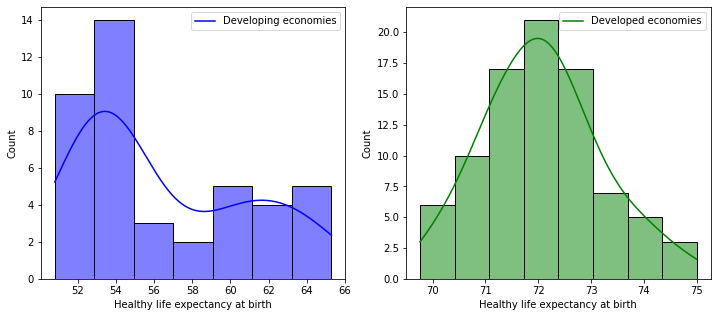

In [22]:
f, axes = plt.subplots(1, 2,figsize=(12,5))
sns.histplot(happinessDataFrame[happinessDataFrame['Country name'].isin(['Afghanistan','Yemen','Bangladesh','Angola'])]['Healthy life expectancy at birth'],kde=True,ax=axes[0],color='b');
sns.histplot(happinessDataFrame[happinessDataFrame['Country name'].isin(['France','Spain','Germany','Finland','Sweden','Portugal'])]['Healthy life expectancy at birth'],kde=True,ax=axes[1],color='g');
axes[0].legend( ['Developing economies'])
axes[1].legend( ['Developed economies'])

### 2.2 Does life expectancy depend on how much you earn ?

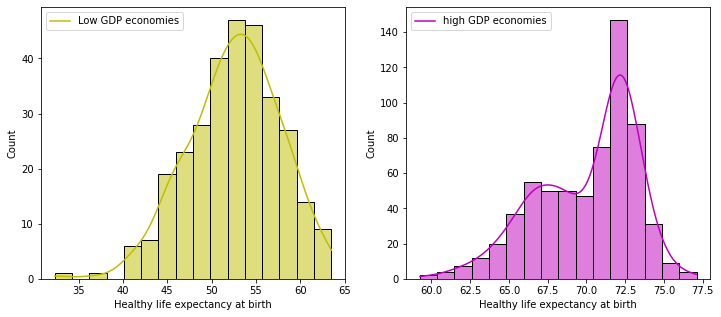

In [23]:
f, axes = plt.subplots(1, 2,figsize=(12,5))
sns.histplot(happinessDataFrame[happinessDataFrame['Log GDP per capita']<8]['Healthy life expectancy at birth'],kde=True,ax=axes[0],color='y');
sns.histplot(happinessDataFrame[happinessDataFrame['Log GDP per capita']>10]['Healthy life expectancy at birth'],kde=True,ax=axes[1],color='m');
axes[0].legend( ['Low GDP economies'])
axes[1].legend( ['high GDP economies'])

## In Lab 6 we will learn how to explore relationships between several variables